# Excitation Generation via Mixed Distribution

In this example we will go into detail and show how to generate motivating time series data from a mixture distribution.

This method came from the [`SNIP`]() in the domain of Symbolic Regression. It has subsequently further extended in [`SymTime`]() to make it applicable to time series data.

In this method, we will first randomly generate the number of mixed distributions $k \in [k_{min}, k_{max}]$. For each mixed distribution we then determine its specific type, and choose whether to use the normal distribution $\mathcal{N}(\mu, \sigma^2)$ or the uniform distribution $\mathcal{U}(\mathrm{a}, \mathrm{b})$ according to the specified probability $p_{\mathrm{select}}$.
$$
\begin{cases}\mathcal{N}(\mu, \sigma ^ 2) \ \mathrm{if} \ p < p_{\mathrm{select}}
 \\
\mathcal{U}(\mathrm{a}, \mathrm{b}) \ \mathrm{if} \ p \ge  p_{\mathrm{select}}
\end{cases}.
$$
After determining the type of each distribution $\mathcal{D}$, we will randomly generate the parameters in each distribution. The mean of the normal distribution is $\mu \sim \mathcal{N}(0, 1)$, the standard deviation $\sigma \sim \mathcal{U}(0, 1)$ or $\mathcal{U}(0, \mu)$. The uniformly distributed parameters $\mathrm{a}, \mathrm{b} \sim \mathcal{U}(u_{min}, u_{max})$ and $a > b$.

Finally we randomly generate the weights of each distribution to mix them with weights. Specifically for the $k$ distributions we generate $\{ w_1, w_2, \cdot, w_k \} \sim \mathcal{U}(0, 1)$ and normalize it to $\sum_{j}^{k}w_j = 1$.

Below we will give a specific code example for excitation generation.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from S2Generator.excitation import MixedDistribution

# Create the instance for Mixed Distribution
mixed_distribution = MixedDistribution(
    min_centroids=1,  # The min number of D
    max_centroids=5,  # The max number of D
    gaussian=True,  # Use the gaussian distribution
    uniform=True,  # Use the uniform distribution
)

# Generate the excitation through `generate` method
time_series = mixed_distribution.generate(
    rng=np.random.RandomState(0), input_dimension=1, n_inputs_points=256
)

print(
    f"The Excitation Method: {str(mixed_distribution)} and Generate the Time Series Data with Shape: {time_series.shape}"
)
print(f"The Available Dict: {mixed_distribution.available_dict}")

The Excitation Method: MixedDistribution and Generate the Time Series Data with Shape: (256, 1)
The Available Dict: {'gaussian': 0.5, 'uniform': 0.5}


Time series data generated by mixed distributions has great randomness and is mainly used to reflect the chaotic representation of the excitation time series, but its internal fluctuation has a certain periodicity.

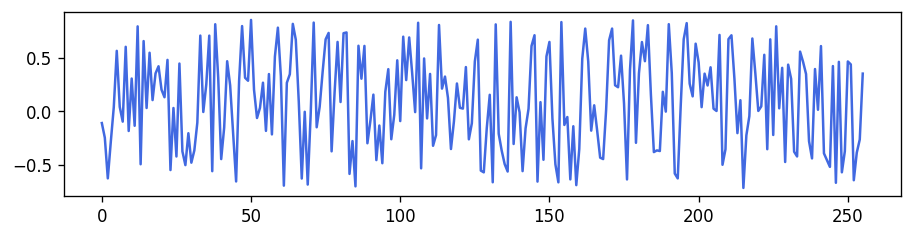

In [2]:
# Visualization for the excitation
fig, ax = plt.subplots(figsize=(9, 2), dpi=120)

ax.plot(time_series, color="royalblue")

We can print and observe the statistical parameters involved in this data generation:

In [3]:
# Print the status value
print(f"Means: {mixed_distribution.get_means}")
print(f"Covariances: {mixed_distribution.get_covariances}")

Means: [[0.07085926]]
Covariances: [[0.6235637]]


We can also generate mixed distribution sampling time series data of multiple dimensions at once:

The Excitation Method: MixedDistribution and Generate the Time Series Data with Shape: (512, 4)


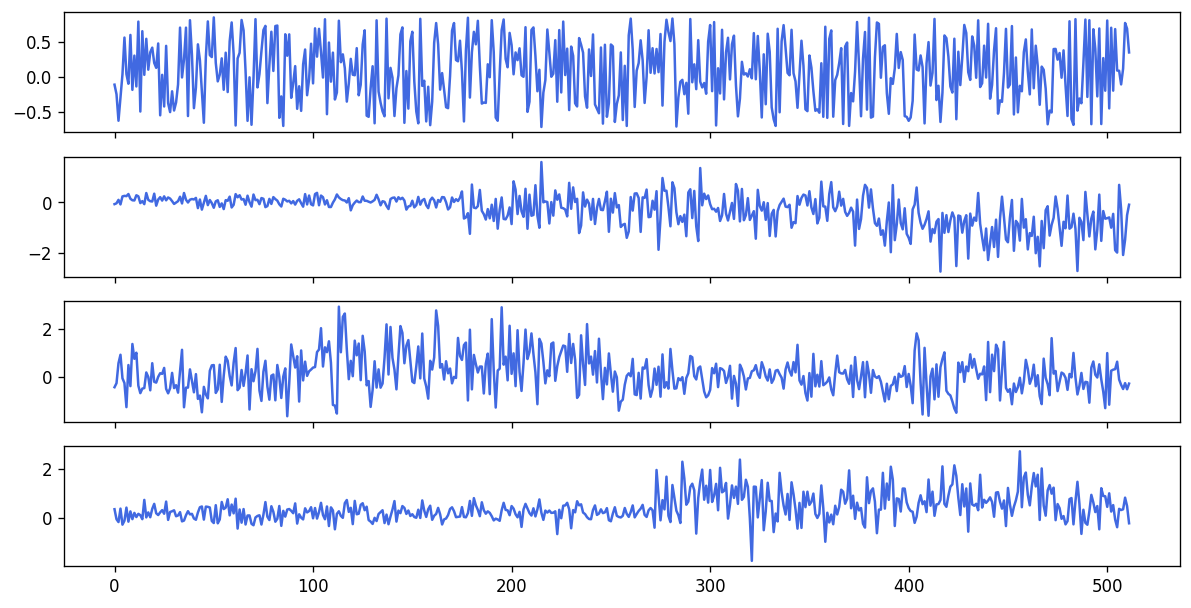

In [4]:
# Generate the multi-dimension time series data
time_series = mixed_distribution.generate(
    rng=np.random.RandomState(0), input_dimension=4, n_inputs_points=512
)
print(
    f"The Excitation Method: {str(mixed_distribution)} and Generate the Time Series Data with Shape: {time_series.shape}"
)

# Visualize the multi-dimension time series data
fig, ax = plt.subplots(4, 1, figsize=(12, 6), dpi=120, sharex=True)
for i in range(4):
    ax[i].plot(time_series[:, i], color="royalblue")

In addition to using random weighting to the mixed distribution, we can also generate **Rotation matrix** to further improve the diversity of the generated excitation time series.

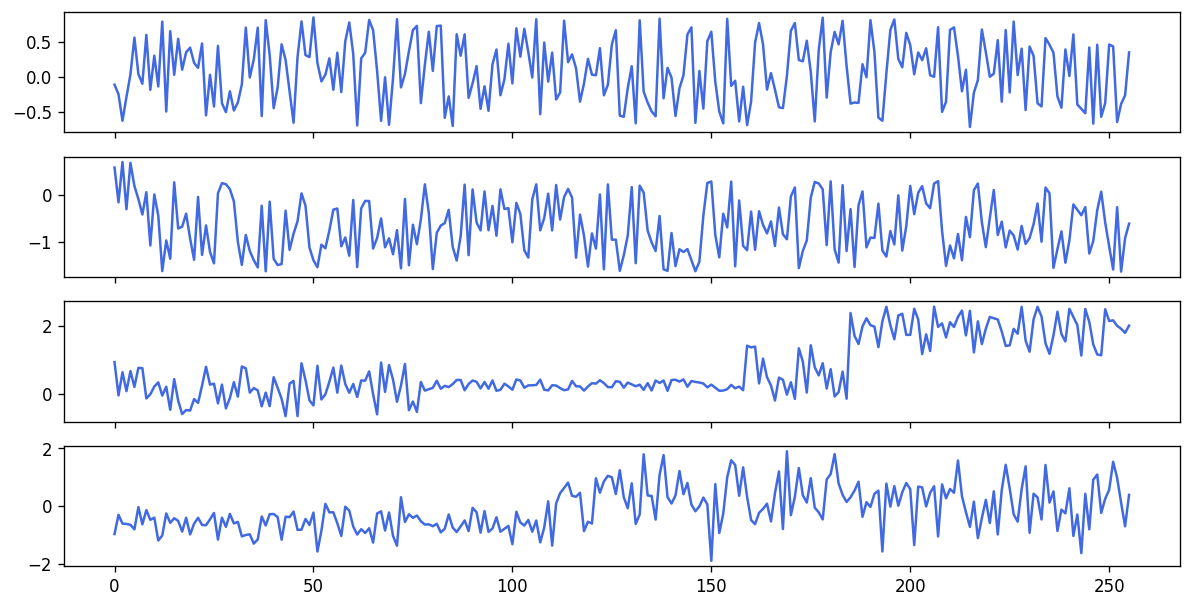

In [5]:
# Create the instance for Mixed Distribution
mixed_distribution = MixedDistribution(
    min_centroids=1,  # The min number of D
    max_centroids=5,  # The max number of D
    gaussian=True,  # Use the gaussian distribution
    uniform=True,  # Use the uniform distribution
    rotate=True,  # Open the rotate matrix
)

# Generate the excitation through `generate` method
time_series = mixed_distribution.generate(
    rng=np.random.RandomState(0), input_dimension=4, n_inputs_points=256
)

# Visualize the multi-dimension time series data
fig, ax = plt.subplots(4, 1, figsize=(12, 6), dpi=120, sharex=True)
for i in range(4):
    ax[i].plot(time_series[:, i], color="royalblue")